# Dice Rolls Probabilities and Simulations

Here I will calculate probabilties for outcomes of rolling multiple dice of various geometries.
I also want to simulate dice rolls and use Matplotlib to plot the frequencies as histograms.
Throughout the notebook I use the following convention to talk about dice rolls:

_**xDd + m (e.g 2D20 + 5)**_

* _**x: The number of dice rolled in a single roll.**_
* _**d: The number of faces on a die (in reality these are restricted to platonic solids).**_
* _**m: A modifier that is used to add a fixed value to the outcome of rolling xDd.**_

So for example _**2D6**_ means rolling two sixed-sided dice and adding the resulting outcomes. Rolling _**3D4 + 2**_ means rolling three four-sided dice, summing their results and then adding a value of 2.

## Simulating Dice Rolls

I have written two functions to simulate dice rolls. The first function will simulate rolling _x_ number of dice with _d_ faces. This will be repeated _n_ times.

The second function will simulate rolling two sets of dice _n_ numbers of times. The first set has _x1_ dice with _d1_ faces. The second set has _x2_ dice with _d2_ faces. 

I then plotted the outcomes as histograms. 

I expected a normal distribution with a mean and standard deviation from the simulation results to approximate the distribution of the results at a sufficient value of x and n. This can be seen in the combined graph.

In [1]:
# Importing the modules needed
%matplotlib inline

import numpy as np # Converting lists to np arrays allows for vectorised operations.
import matplotlib.pyplot as plt # I have used matplotlib to plot the histograms and probability distributions.
import scipy.stats as stats # the SciPy Stats package is used to calculate the pdf basen on the mean and std.
import re # re is used for parsing dice rolls inputted in a string format.
import itertools # Itertools are used to easily produce the combinations of dice rolls possible, for calculating roll probabilities.

In [16]:
def roll_dice(x, d):
    """
    Function to simulate rolling x dice with d number of faces
    """
    roll = 0
    for i in range(x):
        roll += np.random.randint(1, d + 1)
    return roll

def simulate_dice_rolls(n, x, d):
    """This function simulates n dice rolls, for x number of dice, with d number of faces."""
    results = []
    for i in range(n):
        results.append(roll_dice(x, d))
    results = np.asarray(results)
    return results
    

In [17]:
# simulating a single dice rolls n times
n = 100000
x = 5
d = 6
max_roll = x * d

results = simulate_dice_rolls(n, x, d)

In [18]:
# printing the outcome frequencies
for i in range(x, max_roll + 1):
    print(i, np.sum(results == i))

5 15
6 69
7 198
8 500
9 914
10 1619
11 2584
12 3951
13 5312
14 6845
15 8480
16 9471
17 9893
18 10010
19 9421
20 8442
21 6978
22 5467
23 3880
24 2714
25 1584
26 882
27 493
28 206
29 61
30 11


In [19]:
#Setting the width of the figures
plt.rcParams['figure.figsize'] = [15, 5]

Text(0, 0.5, 'Frequency')

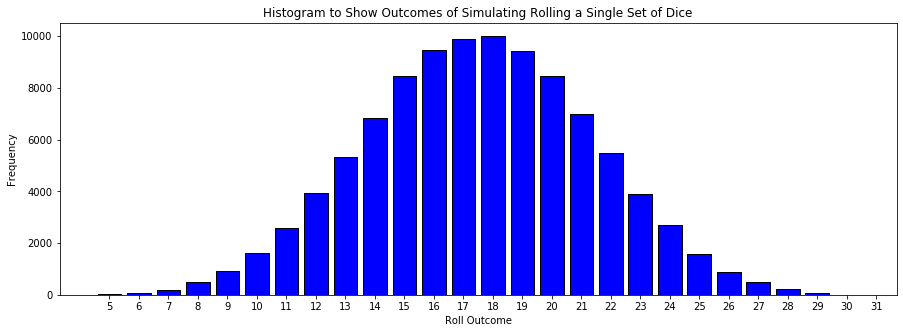

In [20]:
#Setting the width of the figures
plt.rcParams['figure.figsize'] = [15, 5]

#Plotting the results of the simulation a as histogram
plt.hist(results, bins = np.arange(x, max_roll + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(x, max_roll + 2))
plt.title('Histogram to Show Outcomes of Simulating Rolling a Single Set of Dice')
plt.xlabel('Roll Outcome')
plt.ylabel('Frequency')

In [21]:
# Calculating the mean and standard deviation of the results
results.sort()
mean = np.mean(results)
print(mean)
std = np.std(results)
print(std)

17.50847
3.8300350206101252


TypeError: text() missing 2 required positional arguments: 'y' and 's'

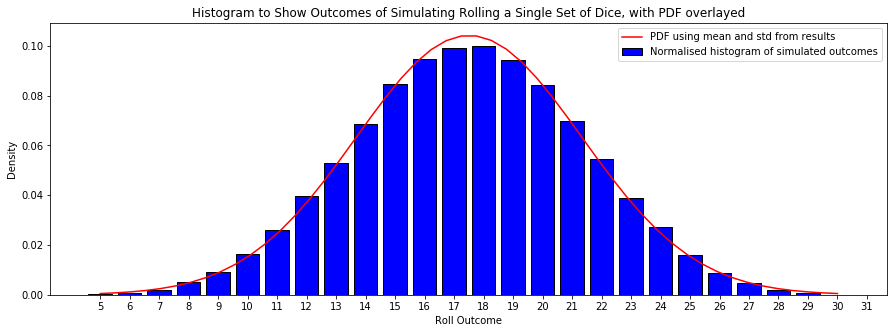

In [31]:
x_range = np.linspace(x, max_roll)
pdf = stats.norm.pdf(x_range, mean, std)
plt.plot(x_range, pdf, color = 'red', label = 'PDF using mean and std from results')
plt.hist(results, bins = np.arange(x, max_roll + 2) - 0.5, histtype = 'bar', rwidth=0.8, 
         facecolor = 'blue', edgecolor="k", density=True, label='Normalised histogram of simulated outcomes')
plt.xticks(np.arange(x, max_roll + 2))
plt.title('Histogram to Show Outcomes of Simulating Rolling a Single Set of Dice, with PDF overlayed')
plt.xlabel('Roll Outcome')
plt.ylabel('Density')
plt.legend(loc='upper right')


### Roll two different sets of dice simultaneously

I also wrote a function which allows for the rolling of two different sets of dice to be simulated.

In [11]:
def simulate_two_sets_dice_rolls(n, x1, d1, x2, d2):
    """This simulates rolling two different sets of dice (with xi dnumber of dice with di number of faces) n times"""
    roll_1 = []
    roll_2 = []
    for i in range(n):
        roll_1.append(roll_dice(x1, d1))
        roll_1_arr = np.asarray(roll_1)
        roll_2.append(roll_dice(x2, d2))
        roll_2_arr = np.asarray(roll_2)
        
    results_2 = roll_1_arr + roll_2_arr
    return results_2


In [12]:
n = 10000
x1 = 2
d1 = 6
x2 = 2
d2 = 6
min_roll = x1 + x2
max_roll_2 = (x1 * d1) + (x2 * d2)

results_2 = simulate_two_sets_dice_rolls(n, x1, d1, x2, d2)

Text(0, 0.5, 'Frequency')

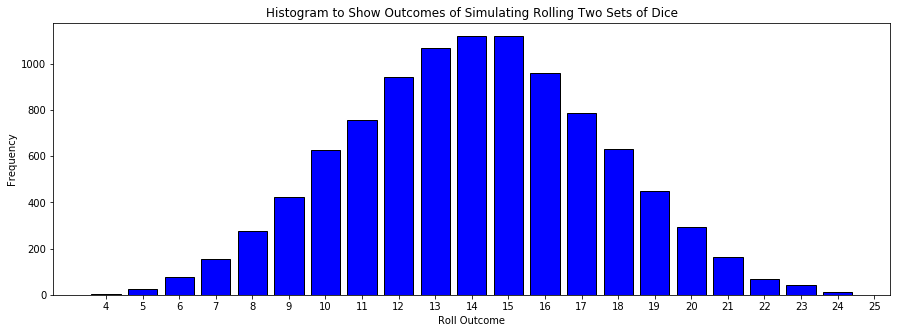

In [13]:
plt.hist(results_2, bins = np.arange(min_roll, max_roll_2 + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(min_roll, max_roll_2 + 2))
plt.title('Histogram to Show Outcomes of Simulating Rolling Two Sets of Dice')
plt.xlabel('Roll Outcome')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

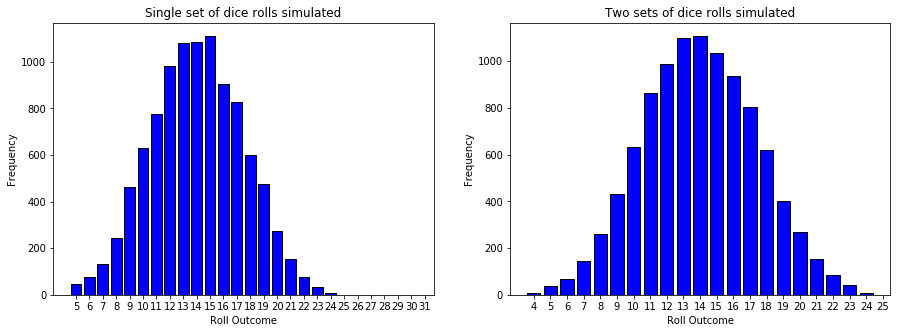

In [14]:
# Plotting single set of dice rolls alongside two sets of dice rolls such that the same number and type of dice are being
# simulated in both cases

n = 10000
x1 = 2
d1 = 6
# Single dice roll
results_1 = simulate_dice_rolls(n, 2*x1, d1)

# Double dice roll
results_2 = simulate_two_sets_dice_rolls(n, x1, d1, x1, d1)

# Plotting two graphs side by side
plt.subplot(121)
plt.hist(results_1, bins = np.arange(x, max_roll + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(x, max_roll + 2))
plt.title('Single set of dice rolls simulated')
plt.xlabel('Roll Outcome')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(results_2, bins = np.arange(min_roll, max_roll_2 + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(min_roll, max_roll_2 + 2))
plt.title('Two sets of dice rolls simulated')
plt.xlabel('Roll Outcome')
plt.ylabel('Frequency')

## Individual Dice Rolls

I have created the _dice_ class to be able to easily assign a die with attributes _x_, _d_ and _m_ and then apply a method to it to obtain one output for a dice roll.

In [15]:
class dice:
    """
    The dice object is used to store the x, d and m attributes of a dice roll. Corresponds to a die xDd + m.
    """
    
    def __init__(self, x, d, m=0):
        self.x = x
        self.d = d
        self.m = m
    
    def roll_dice(self):
        """The roll_dice method returns a dice roll outcome as an int based on the x, d and m values of a dice object"""
        roll = 0
        for i in range(self.x):
            roll += np.random.randint(1, self.d + 1)
        return roll + self.m
        
    def roll_dice_multi(self, n):
        """The roll_dice_muti method outputs n dice roll outcomes as a list based on the x, d and m values of a dice object"""
        self.n = n 
        rolls = []
        for j in range(self.n):
            roll = 0
            for i in range(self.x):
                roll += np.random.randint(1, self.d + 1)
                roll = roll + self.m
            rolls.append(roll)
        return rolls
        

In [16]:
r1 = dice(2, 6, 3)
print(f"single dice roll:  {r1.roll_dice()}")
print(f"multiple dice rolls: {r1.roll_dice_multi(5)}")

single dice roll:  10
multiple dice rolls: [10, 13, 12, 10, 18]


### Take string input for dice rolls

I want to parse the values of _x_, _d_ and _m_ from a string in a form similar to _**"2d6 + 5"**_. This will give a value that corresponds to rollnig 2 six-sided dice and then adding a value of 5. I can then use the roll_dice method to output a dice roll outcome:

```python
r = dice(2, 6)
r.roll_add_mod(5)
```

I need the following requirements:
1. The input format shouldn't be case sensitive, 3d6 == 3D6.
2. A modifier value can be used but is not neccessary.
3. Any spaces between characters are ignored, 2d4 + 2 == 2d4+2 == 2d4 +2 etc.
4. Values should be able to be a integer of any length.

My first attempt did not allow double digit values, required a modifier value and was sensitive to spaces. Therefore it violated requirements 2, 3 and 4:

In [17]:
string = "2d4 + 5"
# can get first and third characters using slicing

x = int(string[0])
d = int(string[2])
print(f"x is {x}")
print(f"d is {d}")

r = dice(x, d)
r.roll_dice()

x is 2
d is 4


6

The position of the modifier value in the string is variable. The best way to access this is to choose the last value. We do this with a negative index.

In [18]:
m = int(string[-1])
print(f"m is {m}")

m is 5


In [19]:
# we can write a new function which can handle a sting input for dice by parsing values for x, d and m

def roll_dice_from_string(string):
    x = int(string[0])
    d = int(string[2])
    r = dice(x, d)
    if '+' in string:
        m = int(string[-1])
        r = dice(x, d, m)
        print("'{}D{} + {}' rolled".format(x, d, m))
        return r.roll_dice()
    else:
        print("'{}D{}' rolled".format(x, d))
        return r.roll_dice()
        

In [20]:
roll_dice_from_string("4D3+  2")

'4D3 + 2' rolled


9

The problem with the above is it only works if the values for x, d and m are single digit values. To take multiple digit values the above must be changed to use D and + as delimiters.

In [21]:
# Split string on d character
string = "2d6 + 6"
string = string.replace(' ', '')
print(string)
roll_elements = re.split('[d, D, +,]', string)

2d6+6


We can redefine the roll from string function so that it takes x, d and m if applicable from the resulting list:



In [22]:
def roll_dice_from_string(string):
    string = string.replace(' ', '')
    print(string)
    roll_elements = re.split('[d, D, +,]', string)
    x = int(roll_elements[0])
    d = int(roll_elements[1])
    r = dice(x, d)
    if len(roll_elements) == 3:
        m = int(roll_elements[2])
        print("'{}D{} + {}' rolled".format(x, d, m))
        r = dice(x, d, m)
        return r.roll_dice()
    else:
        print("'{}D{}' rolled".format(x, d))
        return r.roll_dice()
        

In [23]:
roll_dice_from_string("2d20 + 3")

2d20+3
'2D20 + 3' rolled


26

### Take comma seperated list of rolls as input

To be able to take multiple inputs for dice rolls from a single string, with inputs seperated by a comma, I created a function to convert

In [24]:
rolls = "2d4 + 2, 3d6 + 4, 3D2, 2d20"
rolls_split = rolls.split(',')
print(rolls_split)

['2d4 + 2', ' 3d6 + 4', ' 3D2', ' 2d20']


In [25]:
rolls_list = []
for rolls in rolls_split:
    rolls = rolls.replace(' ', '')
    rolls = re.split('[d, D, +,]', rolls)
    rolls_list.append(rolls)
print (rolls_list)


[['2', '4', '2'], ['3', '6', '4'], ['3', '2'], ['2', '20']]


Next the list elements should all be the same length.
    


Bringing this together ina function:

In [26]:
def roll_dice_from_string_multi(string):
    rolls_list = []
    rolls_split = string.split(',')
    
    for rolls in rolls_split:
        rolls = rolls.replace(' ', '')
        rolls = re.split('[d, D, +,]', rolls)
        rolls_list.append(rolls)
          
    i = 0
    outcomes = []
    for roll in rolls_list:
        i += 1
        x = int(roll[0])
        d = int(roll[1])
        
        if len(roll) == 2:
            print("dice roll {} is '{}D{}'".format(i, x, d))
            r = dice(x, d)
            outcomes.append(r.roll_dice())
            
        else:
            m = int(roll[2])
            print("dice roll {} is '{}D{} + {}'".format(i, x, d, m))
            r = dice(x, d, m)
            outcomes.append(r.roll_dice())
    print(f"Number of rolls: {i}")
    return outcomes

In [27]:
roll_dice_from_string_multi("2d20, 2D8 + 2, 2d6+4")

dice roll 1 is '2D20'
dice roll 2 is '2D8 + 2'
dice roll 3 is '2D6 + 4'
Number of rolls: 3


[29, 13, 11]

## Calculating Probabilites for Dice Rolls

I want to be able to achieve the following:
1. Calculate the probability of each possible outcome, given a specified dice roll.
2. Plot all the probabilites for each outcome, given z specified dice roll.
3. Calculate the probability of a single possible outcome given a specified roll.
4. Plot a probability of a specific outcome against all the probailities for each outcome, given a specified dice roll.

The way I intend to do this is to:
1. Produce all the possible combinations of the outcomes for rolling specified dice. e.g. producing all the possible outcomes for rolling two four-sided die.
2. After producing these combinations, summing the individual dice rolls to give a total outcome for the combined dice roll. For example if I roll 2d6 and get a 2 and a 3, then the total outcome will be 2 + 3 = 5.
3. If there a any modifier present in the dice roll, add it to all the total outcomes.
4. Count the frequency of each total outcome.
5. Divide each frequency by the total  number of combinations. This will give the probability for each outcome.

Tjhe best way to do this is with Numpy arrays. This is because it is much easier and quicker to do vector operations, such as adding a modifier to each outcome, diving each frequency by the total number of outcomes etc.

I will use the module itertools to produce all the possible combinations of multiple dice.

In [34]:
# creating list of all the dice roll combinations

x = 2
d = 4
combinations = itertools.product(range(1, d + 1), repeat = x)

In [35]:
combinations

This can then be converted to a list and then to a NumPy array:

In [36]:
combinations_array = np.asarray(list(combinations))

In [37]:
combinations_array

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4]])

I now want to sum the elements to get the possible outcomes of the rolls. Then I can count the frequency of each outcome:

In [38]:
row_sums = combinations_array.sum(axis=1)

In [39]:
# np.unique as the option to return the counts for each unique element
outcome, count = np.unique(row_sums, return_counts=True)

Calculating the probabilities of each outcome by diving the count of the outcome by the total number of outcomes (length of the original list):

In [40]:
p = count/len(combinations_array)

In [41]:
p

array([0.0625, 0.125 , 0.1875, 0.25  , 0.1875, 0.125 , 0.0625])

Bringing the outcomes, counts and probabilities into a single array:

In [42]:
probability_array = np.asarray([outcome, count, p])

In [43]:
probability_array = probability_array.T

In [44]:
probability_array

array([[2.    , 1.    , 0.0625],
       [3.    , 2.    , 0.125 ],
       [4.    , 3.    , 0.1875],
       [5.    , 4.    , 0.25  ],
       [6.    , 3.    , 0.1875],
       [7.    , 2.    , 0.125 ],
       [8.    , 1.    , 0.0625]])

If we need to add a modifier we can add it to the outcomes column:

In [45]:
m = 5

probability_array[:, 0] = probability_array[:, 0] + m

In [46]:
probability_array

array([[ 7.    ,  1.    ,  0.0625],
       [ 8.    ,  2.    ,  0.125 ],
       [ 9.    ,  3.    ,  0.1875],
       [10.    ,  4.    ,  0.25  ],
       [11.    ,  3.    ,  0.1875],
       [12.    ,  2.    ,  0.125 ],
       [13.    ,  1.    ,  0.0625]])

In a function this can be added to the 1-D outcome array rather than the probability array.

<BarContainer object of 7 artists>

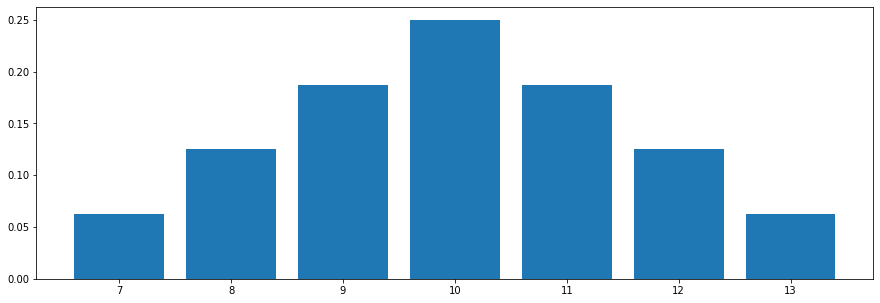

In [47]:
x_values = probability_array[:, 0]
y_values = probability_array[:, 2]
plt.bar(x_values, y_values)

A method can be written in the dice class which produces the probabilities array for the specified dice roll:

In [3]:
class dice:
    """
    The dice object is used to store the x, d and m attributes of a dice roll. Corresponds to a die xDd + m.
    """
    
    def __init__(self, x, d, m=0):
        self.x = x
        self.d = d
        self.m = m
    
    def roll_dice(self):
        """The roll_dice method returns a dice roll outcome as an int based on the x, d and m values of a dice object"""
        roll = 0
        for i in range(self.x):
            roll += np.random.randint(1, self.d + 1)
        return roll + self.m
        
    def roll_dice_multi(self, n):
        """The roll_dice_muti method outputs n dice roll outcomes as a list based on the x, d and m values of a dice object"""
        self.n = n 
        rolls = []
        for j in range(self.n):
            roll = 0
            for i in range(self.x):
                roll += np.random.randint(1, self.d + 1)
                roll = roll + self.m
            rolls.append(roll)
        return rolls
    
    def calc_outcome_probabilities(self):
        combinations = itertools.product(range(1, self.d + 1), repeat = self.x)
        combinations_array = np.asarray(list(combinations))
        row_sums = combinations_array.sum(axis=1)
        outcome, count = np.unique(row_sums, return_counts=True)
        outcome = outcome + self.m
        p = count/len(combinations_array)
        probability_array = np.asarray([outcome, count, p])
        return probability_array.T

In [18]:
r1 = dice(2, 6)
r1.calc_outcome_probabilities()

array([[ 2.        ,  1.        ,  0.02777778],
       [ 3.        ,  2.        ,  0.05555556],
       [ 4.        ,  3.        ,  0.08333333],
       [ 5.        ,  4.        ,  0.11111111],
       [ 6.        ,  5.        ,  0.13888889],
       [ 7.        ,  6.        ,  0.16666667],
       [ 8.        ,  5.        ,  0.13888889],
       [ 9.        ,  4.        ,  0.11111111],
       [10.        ,  3.        ,  0.08333333],
       [11.        ,  2.        ,  0.05555556],
       [12.        ,  1.        ,  0.02777778]])

In [19]:
r2 = dice(2, 4, 3)
r2.calc_outcome_probabilities()

array([[ 5.    ,  1.    ,  0.0625],
       [ 6.    ,  2.    ,  0.125 ],
       [ 7.    ,  3.    ,  0.1875],
       [ 8.    ,  4.    ,  0.25  ],
       [ 9.    ,  3.    ,  0.1875],
       [10.    ,  2.    ,  0.125 ],
       [11.    ,  1.    ,  0.0625]])

I want to be able to easily plot the results of the able method in Matplotlib. For that I can write a function:

In [4]:
def plot_outcome_probabilities(x, d, m=0):
    r = dice(x, d, m)
    array = r.calc_outcome_probabilities()
    x_values = array[:, 0]
    y_values = array[:, 2]
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.bar(x_values, y_values)
    plt.plot(x_values, y_values, color = 'red')
    #plot different titles depending if m = 0 or not
    
    if  m == 0:
          plt.title(f'Probabilities for each Outcome of Rolling {x}D{d}')
    else:
          plt.title(f'Probabilities for each Outcome of Rolling {x}D{d} + {m}')

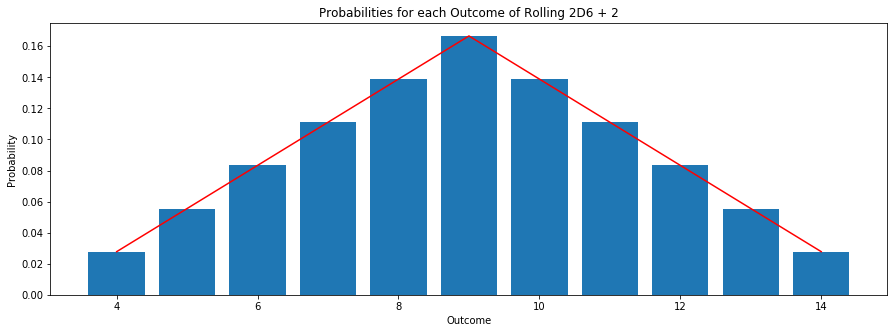

In [5]:
plot_outcome_probabilities(2, 6, 2)

To calculate the probability of a given outcome you can filter the outcomes array, for example calculating the probability of rolling 8, when rolling 2 six-sided dice:

In [245]:
r = dice(2, 6)
array = r.calc_outcome_probabilities()

In [246]:
array_filtered = array[array[:, 0] == 8]

In [247]:
probability = float(array_filtered[:,2])

In [248]:
probability

0.1388888888888889

Plotting this probability on top of the previous graph:

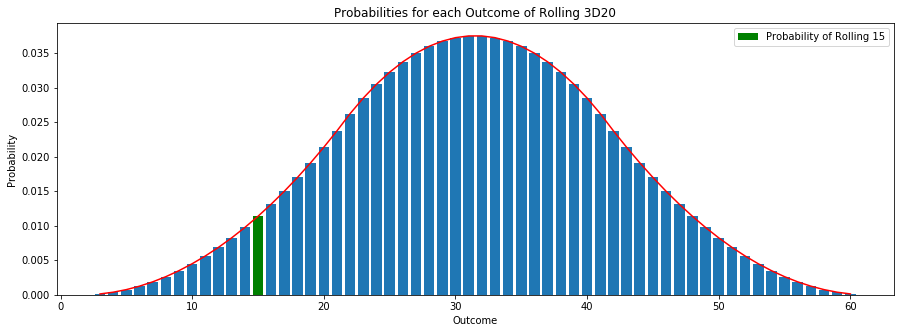

In [59]:
x = 3
d = 20
v = 15

plot_outcome_probabilites(x, d)
r = dice(x, d)
array = r.calc_outcome_probabilities()
array_filtered = array[array[:, 0] == v]
probability = float(array_filtered[:,2])
plt.bar(v, probability, color = 'green', label = f'Probability of Rolling {v}')
plt.legend(loc = 'upper right')